# Text data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Bag of Words
- document-term matrix
- tfidf

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
corpus = [
    'This is the first document',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
]

In [4]:
vect = CountVectorizer()
X = vect.fit_transform(corpus)
print(X.toarray())
print(vect.get_feature_names())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [5]:
vect = TfidfVectorizer()
X = vect.fit_transform(corpus)
print(X.toarray().round(1))
print(vect.get_feature_names())

[[0.  0.5 0.6 0.4 0.  0.  0.4 0.  0.4]
 [0.  0.7 0.  0.3 0.  0.5 0.3 0.  0.3]
 [0.5 0.  0.  0.3 0.5 0.  0.3 0.5 0.3]
 [0.  0.5 0.6 0.4 0.  0.  0.4 0.  0.4]]
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [6]:
vect = TfidfVectorizer(ngram_range=[1,2], stop_words='english')
X = vect.fit_transform(corpus)
print(X.toarray().round(1))
print(vect.get_feature_names())

[[1.  0.  0.  0. ]
 [0.6 0.5 0.5 0.5]
 [0.  0.  0.  0. ]
 [1.  0.  0.  0. ]]
['document', 'document second', 'second', 'second document']


### practical example

In [7]:
!curl -L https://bit.ly/2WC9nvn -o spam.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   141  100   141    0     0   2660      0 --:--:-- --:--:-- --:--:--  2660
100   137    0   137    0     0    453      0 --:--:-- --:--:-- --:--:--  7210
100   318  100   318    0     0    493      0 --:--:-- --:--:-- --:--:--   493
100  488k  100  488k    0     0   320k      0  0:00:01  0:00:01 --:--:-- 1449k


In [8]:
sms = pd.read_csv('spam.csv', encoding='latin-1')
sms.head(3)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [9]:
sms.columns = ['category', 'text']
sms.head(3)

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [10]:
sms['category'].value_counts()

ham     4827
spam     747
Name: category, dtype: int64

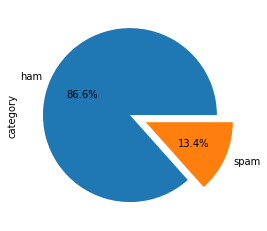

In [11]:
sms['category'].value_counts().plot(kind='pie', explode=[0, 0.2], autopct='%1.1f%%')

In [12]:
sms.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
sms_corpus = sms['text']
vect = CountVectorizer(min_df=10, stop_words='english')
X = vect.fit_transform(sms_corpus)
X.shape

(5574, 837)

In [14]:
# 5 most frequently appeared words
iidx = X.toarray().sum(0).argsort()[-5:][::-1]
iidx
[vect.get_feature_names()[i] for i in iidx]

['ur', 'just', 'gt', 'lt', 'ok']

In [15]:
vect = TfidfVectorizer(min_df=10, stop_words='english')
X = vect.fit_transform(sms_corpus)
iidx = X.toarray().sum(0).argsort()[-5:][::-1]
print([vect.get_feature_names()[i] for i in iidx])
print([X.toarray().sum(0)[i] for i in iidx])

['ok', 'just', 'll', 'ur', 'come']
[122.06978727192575, 106.16332625717925, 96.57382567023429, 91.57779277147964, 87.15189392798636]


### word cloud

In [16]:
spam_sms = sms[sms["category"] == "spam"]["text"]
ham_sms = sms[sms["category"] == "ham"]["text"]

spam_words = []
ham_words = []

In [17]:
spam_sms.values.shape

(747,)

In [18]:
!pip install nltk

In [19]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
for i in range(spam_sms.values.shape[0]):
    msg = spam_sms.values[i]
    words = [word.lower() for word in word_tokenize(msg)
                              if word.lower() not in stopwords.words('english') and
                                 word.lower().isalpha()]
    spam_words = spam_words + words

In [21]:
len(spam_words)

9411

In [22]:
!pip install wordcloud

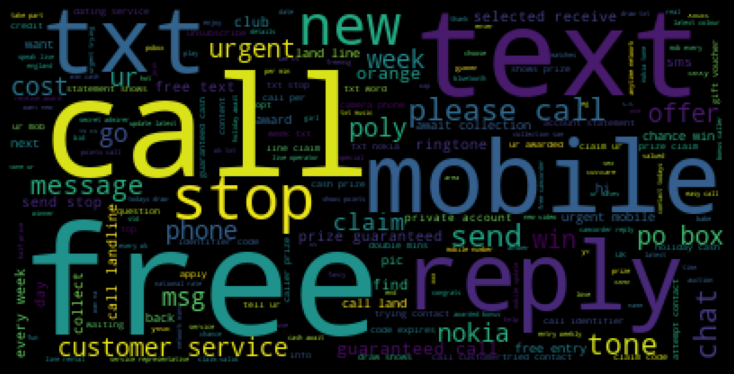

In [23]:
from wordcloud import WordCloud
wc = WordCloud(width=400, height=200)
spam_wordcloud = wc.generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

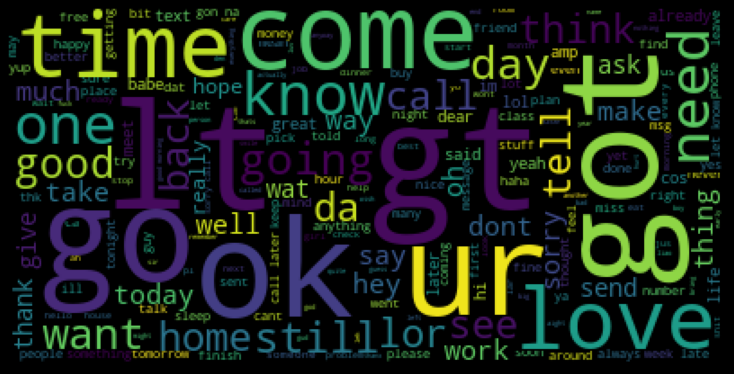

In [24]:
for i in range(ham_sms.values.shape[0]):
    msg = ham_sms.values[i]
    words = [word.lower() for word in word_tokenize(msg) 
                               if word.lower() not in stopwords.words('english') and
                                  word.lower().isalpha()]
    ham_words = ham_words + words
    
wc = WordCloud(width=400, height=200)
ham_wordcloud = wc.generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Word Embedding
- word vector

In [25]:
!pip install gensim

In [26]:
from gensim.models.word2vec import Word2Vec

In [27]:
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]

In [28]:
model = Word2Vec(sentences, min_count=1, size=5)

In [29]:
print(model)

Word2Vec(vocab=14, size=5, alpha=0.025)


In [30]:
words = list(model.wv.vocab)   # summarize the vocabulary
words

['this',
 'is',
 'the',
 'first',
 'sentence',
 'for',
 'word2vec',
 'second',
 'yet',
 'another',
 'one',
 'more',
 'and',
 'final']

In [31]:
model['sentence','this']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[-0.07360891, -0.08104282,  0.09224436,  0.04534017, -0.05991185],
       [ 0.09978287,  0.04504628, -0.05950257, -0.04451895,  0.07824776]],
      dtype=float32)

In [32]:
# dim 5 --> dim 2  (dimension reduction)
from sklearn.decomposition import PCA


In [33]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [34]:
result

array([[ 0.12631011, -0.03902413],
       [ 0.11206164,  0.11972871],
       [ 0.05787287,  0.03954911],
       [ 0.09734677, -0.09206831],
       [-0.12058187,  0.05975332],
       [ 0.01708128, -0.00868151],
       [-0.06660023, -0.10196508],
       [-0.06395376, -0.02451273],
       [-0.04749452, -0.09769993],
       [-0.10853985, -0.0205589 ],
       [-0.08010589,  0.03789421],
       [ 0.13725308, -0.01865154],
       [-0.02033162,  0.09009062],
       [-0.04031797,  0.05614612]], dtype=float32)

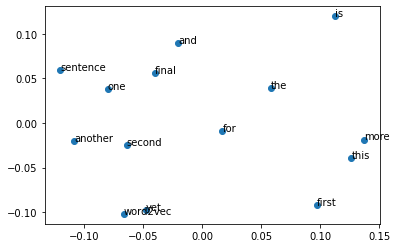

In [35]:
plt.scatter(result[:,0], result[:,1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.show()

In [36]:
model[words]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[ 0.09978287,  0.04504628, -0.05950257, -0.04451895,  0.07824776],
       [ 0.0404408 , -0.05262432, -0.07610187,  0.0950079 ,  0.08337338],
       [-0.08103418, -0.05398033, -0.08920557, -0.00720357,  0.0419652 ],
       [ 0.07861444, -0.06451997, -0.08991975, -0.08234209, -0.0599655 ],
       [-0.07360891, -0.08104282,  0.09224436,  0.04534017, -0.05991185],
       [ 0.05883705,  0.04182218,  0.016269  ,  0.00709014,  0.01369704],
       [-0.00844801,  0.08460455,  0.03486185, -0.0618406 , -0.07583568],
       [ 0.0285169 ,  0.04925902,  0.08700962, -0.0050735 , -0.01904207],
       [ 0.00601184,  0.00272969,  0.03780161, -0.0833842 , -0.07462262],
       [-0.09002983,  0.03533381,  0.07286477, -0.02658113, -0.02807553],
       [ 0.00187836,  0.03233001,  0.05836576,  0.07912429, -0.06030075],
       [ 0.08911101,  0.01222245, -0.09351207, -0.01960206,  0.05271451],
       [ 0.02482091, -0.04731681,  0.0536425 ,  0.08099523,  0.01714202],
       [ 0.00588182,  0.08154559,  0.0

In [37]:
model.most_similar('word2vec')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('yet', 0.7754184603691101),
 ('second', 0.6136837005615234),
 ('another', 0.5897418856620789),
 ('one', 0.27571430802345276),
 ('for', 0.21004550158977509),
 ('final', 0.11348579078912735),
 ('first', 0.01676790602505207),
 ('sentence', -0.058945879340171814),
 ('this', -0.11083297431468964),
 ('more', -0.3036477863788605)]

In [38]:
model.similarity('sentence', 'word2vec')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


-0.05894589